In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline


# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/loisstetson/Project-4-Meteorite-Landings/main/Resources/Meteorite_Landings.csv')

# Display the first few rows of the dataset
data

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"


In [108]:
# Check for missing values
print(data.isnull().sum())

name              0
id                0
nametype          0
recclass          0
mass (g)        131
fall              0
year            291
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64


In [109]:
# Dropping rows with NaN in 'GeoLocation' and dropping the 'nametype' column
data_cleaned = data.dropna(subset=['GeoLocation']).drop(columns=['nametype'])

# Renaming the 'mass (g)' column to 'mass_grams'
data_cleaned = data_cleaned.rename(columns={'mass (g)': 'mass'})
data_cleaned

,name,id,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"


In [110]:
data_cleaned.to_csv('data_cleaned.csv', index=False)


In [111]:
# Basic statistics to identify outliers
print("\nBasic Statistical Details:\n", data_cleaned.describe())


Basic Statistical Details:
                  id          mass          year        reclat       reclong
count  38401.000000  3.828200e+04  38223.000000  38401.000000  38401.000000
mean   25439.160465  1.558098e+04   1989.828376    -39.122580     61.074319
std    17444.614720  6.273203e+05     26.709201     46.378511     80.647298
min        1.000000  0.000000e+00    860.000000    -87.366670   -165.433330
25%    10879.000000  6.700000e+00   1986.000000    -76.714240      0.000000
50%    21789.000000  2.934500e+01   1996.000000    -71.500000     35.666670
75%    40042.000000  1.891750e+02   2002.000000      0.000000    157.166670
max    57458.000000  6.000000e+07   2101.000000     81.166670    354.473330


In [112]:
# Check data types for inconsistencies
print("\nData Types:\n", data_cleaned.dtypes)


Data Types:
 name            object
id               int64
recclass        object
mass           float64
fall            object
year           float64
reclat         float64
reclong        float64
GeoLocation     object
dtype: object


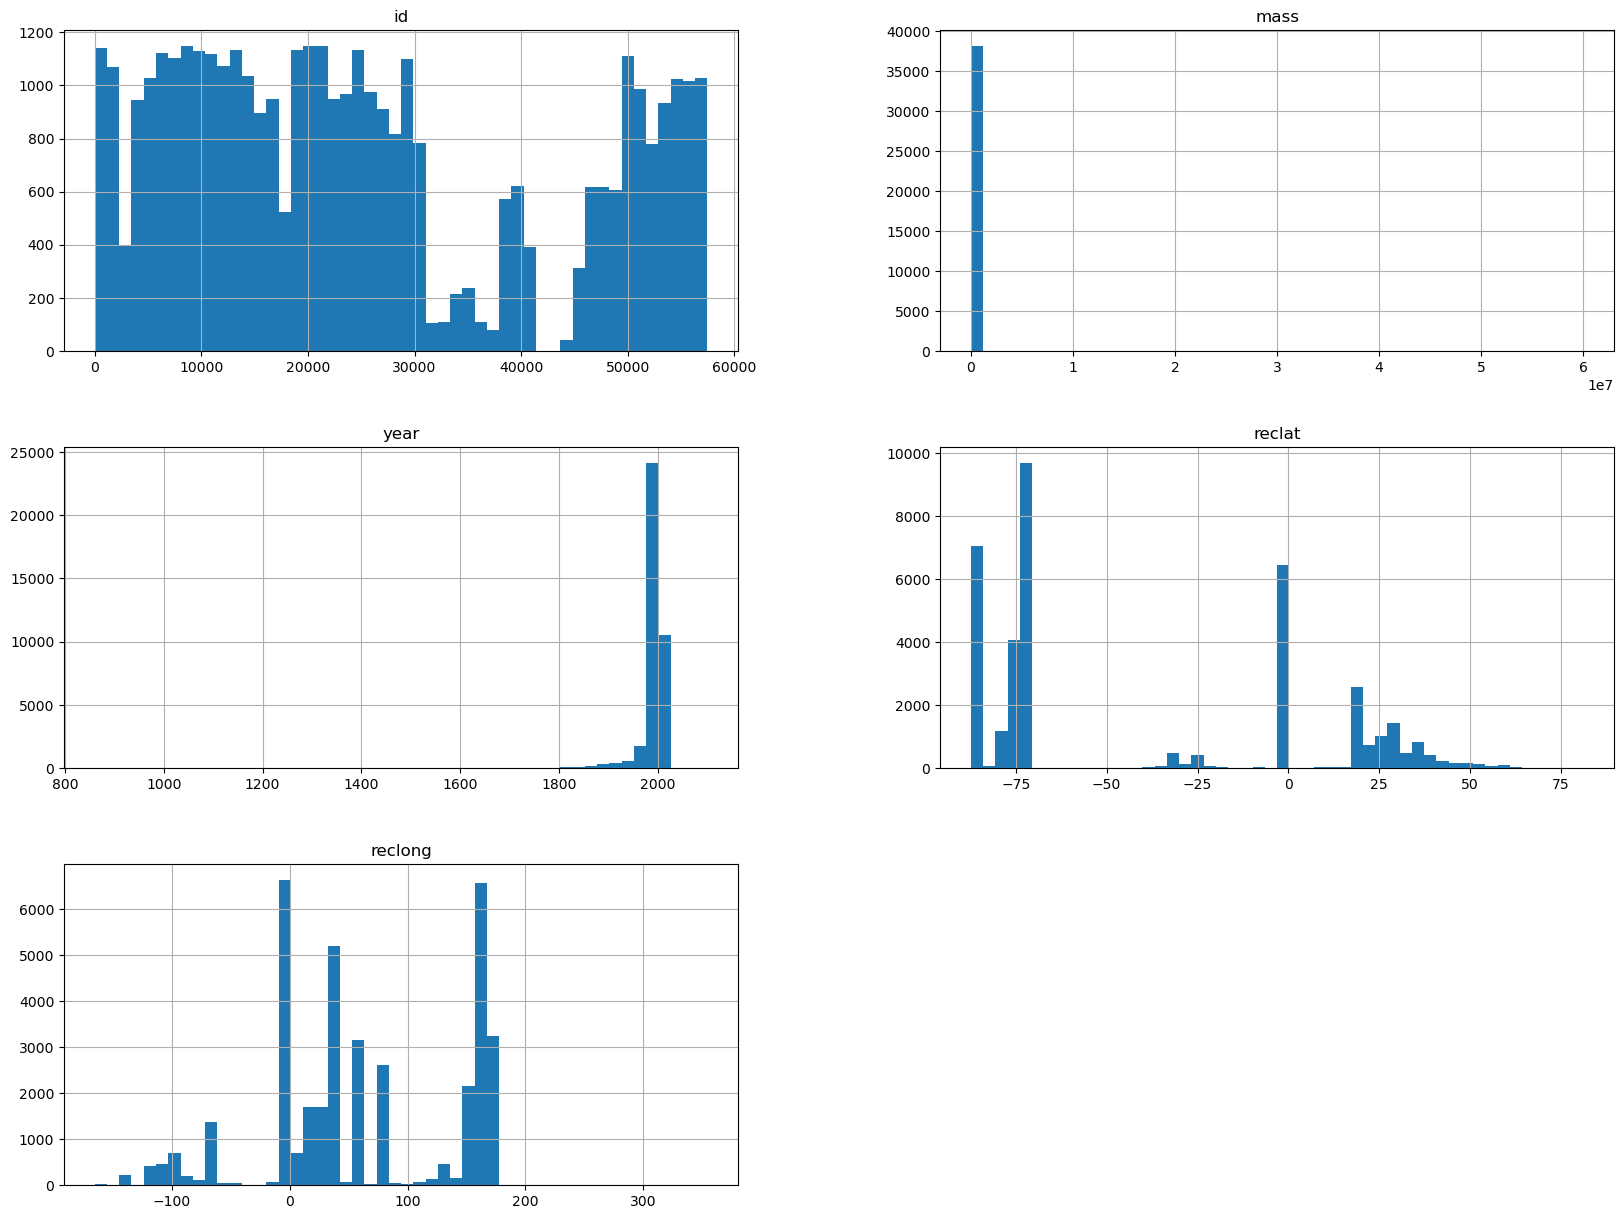

In [117]:
# Histograms for distribution
data_cleaned.hist(bins=50, figsize=(20,15))
plt.show()

C:\Users\Lois\AppData\Local\Temp\ipykernel_21440\2628153480.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_cleaned.corr()


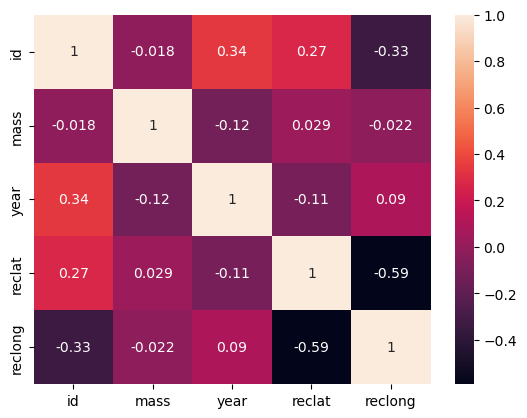

In [118]:
# Correlation matrix
correlation_matrix = data_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [116]:
# One-hot encoding
data_encoded = pd.get_dummies(data_cleaned, columns=['name', 'recclass', 'fall', 'GeoLocation'])

data_encoded

,id,mass,year,reclat,reclong,name_Aachen,name_Aarhus,name_Abajo,name_Abar al' Uj 001,name_Abbott,...,"GeoLocation_(9.23333, 78.35)","GeoLocation_(9.31667, -70.62833)","GeoLocation_(9.33333, 80.83333)","GeoLocation_(9.36667, 42.41667)","GeoLocation_(9.5, 31.75)","GeoLocation_(9.5, 35.33333)","GeoLocation_(9.53333, 39.71667)","GeoLocation_(9.6, 9.91667)","GeoLocation_(9.66667, 105.66667)","GeoLocation_(9.91667, 13.98333)"
0,1,21.0,1880.0,50.77500,6.08333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,720.0,1951.0,56.18333,10.23333,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,107000.0,1952.0,54.21667,-113.00000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10,1914.0,1976.0,16.88333,-99.90000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,370,780.0,1902.0,-33.16667,-64.95000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45711,31356,172.0,1990.0,29.03700,17.01850,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45712,30409,46.0,1999.0,13.78333,8.96667,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45713,30410,3.3,1939.0,49.25000,17.66667,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45714,31357,2167.0,2003.0,49.78917,41.50460,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
# Load dataset
iris = load_iris()
X = iris.data  # features
y = iris.target  # target variable

In [156]:
#compress the data by elimnating non numerical columns
data_compressed = data_cleaned.drop(columns=['name','recclass', 'fall', 'GeoLocation', 'id'])
data_compressed

,mass,year,reclat,reclong
0,21.0,1880.0,50.77500,6.08333
1,720.0,1951.0,56.18333,10.23333
2,107000.0,1952.0,54.21667,-113.00000
3,1914.0,1976.0,16.88333,-99.90000
4,780.0,1902.0,-33.16667,-64.95000
...,...,...,...,...
45711,172.0,1990.0,29.03700,17.01850
45712,46.0,1999.0,13.78333,8.96667
45713,3.3,1939.0,49.25000,17.66667
45714,2167.0,2003.0,49.78917,41.50460


In [150]:
# Separate features and target
X = data_compressed.drop('reclong', axis=1)  
y = data_compressed['reclat']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [154]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

#excluding the target column for scaling
features = data_compressed.drop('mass', axis=1)
scaled_features = scaler.fit_transform(features)

# Replace original features with scaled features
data_compressed.loc[:, features.columns] = scaled_features

In [157]:
# Drop rows with missing values
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

# Now fit the model
model = LogisticRegression()
model.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'

In [158]:
# Drop rows with missing values
X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]

# Predict and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [ ]:
import plotly.express as px
# Create a scatter plot on the map
fig = px.scatter_mapbox(
    data_cleaned, 
    lat='reclat', 
    lon='reclong',
    mass(g)='size',  # column to add to hover information
    zoom=3,  # Controls the initial zoom level
    height=300  # Adjust height of the figure
)

# Set the mapbox style
fig.update_layout(mapbox_style="open-street-map")

# Show the figure
fig.show()

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (595953472.py, line 7)